Importing modules


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Loading the data

In [3]:
iris_data = pd.read_csv('/content/drive/MyDrive/Iris Flower - Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data = iris_data.drop(['Id'], axis = 1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data Visualization


Text(0.5, 1.0, 'Sepal width with sepal length comparision of Iris species')

<Figure size 2000x500 with 0 Axes>

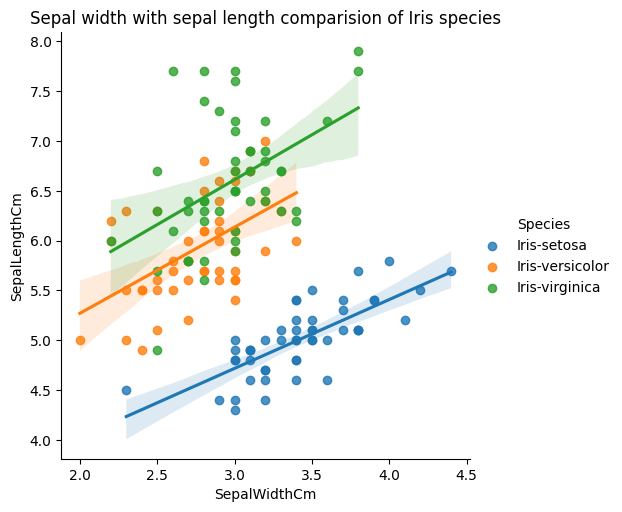

In [10]:
fig = plt.figure(figsize=(20,5))
sns.lmplot(data=iris_data, x='SepalWidthCm', y='SepalLengthCm', hue='Species') # Fixed potential typos in column names
plt.title('Sepal width with sepal length comparision of Iris species')

Text(0.5, 1.0, 'Petal width with petal length comparision of Iris species')

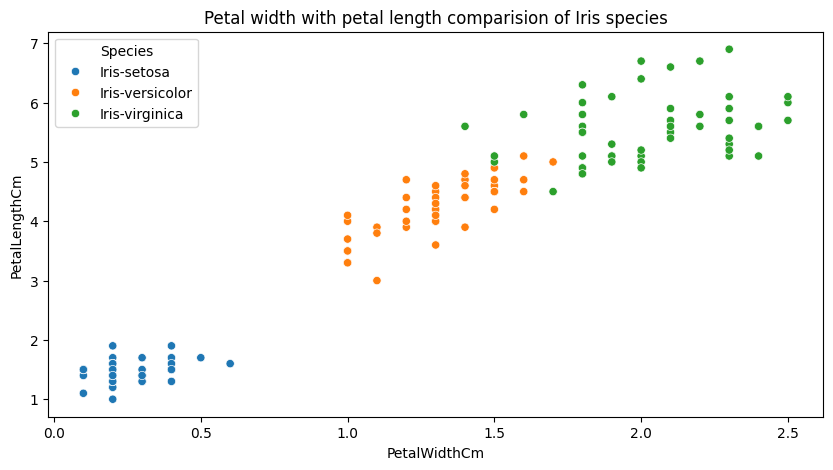

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=iris_data, x='PetalWidthCm', y='PetalLengthCm', hue='Species')
plt.title('Petal width with petal length comparision of Iris species')

Text(0.5, 1.0, 'Pairplot of Iris species')

<Figure size 1000x500 with 0 Axes>

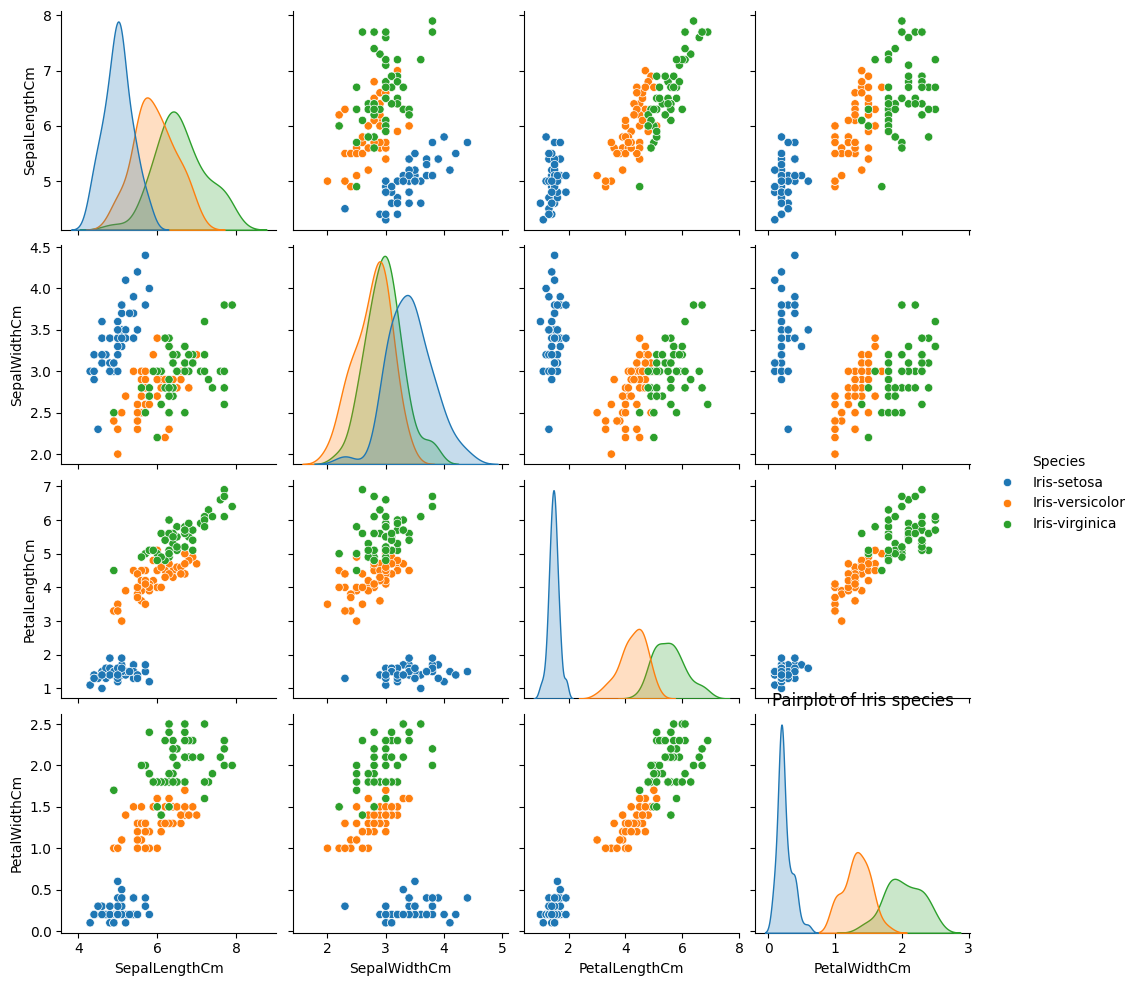

In [15]:
plt.figure(figsize=(10,5))
sns.pairplot(iris_data, hue='Species')
plt.title('Pairplot of Iris species')

In [16]:
data = iris_data.values
X = data[:,0:4]
Y = data[:,4]

model 1 : Support Vector Model

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
train_X , test_X , train_Y , test_Y = train_test_split(X,Y, test_size = 0.2)

model = SVC()
model.fit(train_X, train_Y)


SVC()

In [37]:
pred_svm = model.predict(test_X)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(test_Y, pred_svm)

0.9666666666666667

Model 2 : DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(train_X, train_Y)

DecisionTreeClassifier(random_state=0)

In [41]:
pred_dtr = model.predict(test_X)
accuracy_score(test_Y,pred_dtr)

0.9666666666666667

Model3: KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_Y)

KNeighborsClassifier()

In [43]:
knn_pred = model.predict(test_X)
accuracy_score(test_Y,knn_pred)

0.9666666666666667

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [46]:
print(classification_report(test_Y, pred_dtr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [47]:
print(classification_report(test_Y, knn_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

